# Basic NFL analysis
Let's get familiar with the NFL result data that we have loaded into the database
We'll look at average fantasy points for each positional player
We'll also look at if that has changed over time

In [2]:
import os
from pathlib import Path
from sqlalchemy import create_engine

# Define your database file path (SQLite example)
rel_db_path = Path.cwd().parent.parent / 'raw_data' / 'nfl' / 'src_code' / 'nfl.db'
db_file_path = rel_db_path.resolve()
engine = create_engine(f'sqlite:///{db_file_path}')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///{db_file_path}

In [5]:
%%sql
SELECT
    player
FROM nfl_results
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


ranker,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_yds_per_att,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,fumbles,fumbles_lost,all_td,two_pt_md,two_pt_pass,fantasy_points,fantasy_points_ppr,draftkings_points,fanduel_points,vbd,fantasy_rank_pos,fantasy_rank_overall,player_id,Year
1,David Johnson*+,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5.0,3,20,1.0,None,328.0,407.8,416.8,367.8,191.0,1,1.0,JohnDa08,2016
2,Ezekiel Elliott*+,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5.0,1,16,None,None,293.0,325.4,332.4,309.4,156.0,2,2.0,ElliEz00,2016
3,Aaron Rodgers*,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,None,0,8.0,4,4,1.0,1.0,380.0,380.0,397.0,387.0,119.0,1,3.0,RodgAa00,2016
4,LeSean McCoy*,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3.0,0,14,1.0,None,248.0,298.3,304.3,273.3,111.0,3,4.0,McCoLe01,2016
5,Le'Veon Bell*,PIT,RB,24,12,12,0,1,0,0,0,261,1268,4.86,7,94,75,616,8.21,2,4.0,1,9,1.0,None,242.0,317.4,324.4,279.9,105.0,4,5.0,BellLe00,2016
6,DeMarco Murray*,TEN,RB,28,16,16,1,2,10,1,0,293,1287,4.39,9,67,53,377,7.11,3,3.0,1,12,None,None,241.0,293.8,300.8,267.3,104.0,5,6.0,MurrDe00,2016
7,Devonta Freeman*,ATL,RB,24,16,16,0,0,0,0,0,227,1079,4.75,11,65,54,462,8.56,2,1.0,1,13,None,None,230.0,284.1,291.1,257.1,93.0,6,7.0,FreeDe00,2016
8,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2.0,1,18,None,None,226.0,232.9,236.9,229.4,89.0,7,8.0,BlouLe00,2016
9,Matt Ryan*+,ATL,QB,31,16,16,373,534,4944,38,7,35,117,3.34,0,0,0,0,None,0,4.0,2,0,1.0,1.0,347.0,347.5,362.5,354.5,87.0,2,9.0,RyanMa00,2016
10,Mike Evans*,TAM,WR,23,16,16,0,0,0,0,0,0,0,None,0,173,96,1321,13.76,12,0.0,0,12,2.0,None,208.0,304.1,307.1,256.1,82.0,1,10.0,EvanMi00,2016


# Let's look at how players have scored over time for each position

In [16]:
position_graphs = """
SELECT
    fantasy_pos,
    fantasy_points,
    fantasy_rank_overall,
    year
FROM nfl_results
WHERE 1=1
    AND fantasy_rank_overall < 200
"""

In [34]:
%%sql
$position_graphs
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,fantasy_points,fantasy_rank_overall,Year
RB,328.0,1.0,2016
RB,293.0,2.0,2016
QB,380.0,3.0,2016
RB,248.0,4.0,2016
RB,242.0,5.0,2016
RB,241.0,6.0,2016
RB,230.0,7.0,2016
RB,226.0,8.0,2016
QB,347.0,9.0,2016
WR,208.0,10.0,2016


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


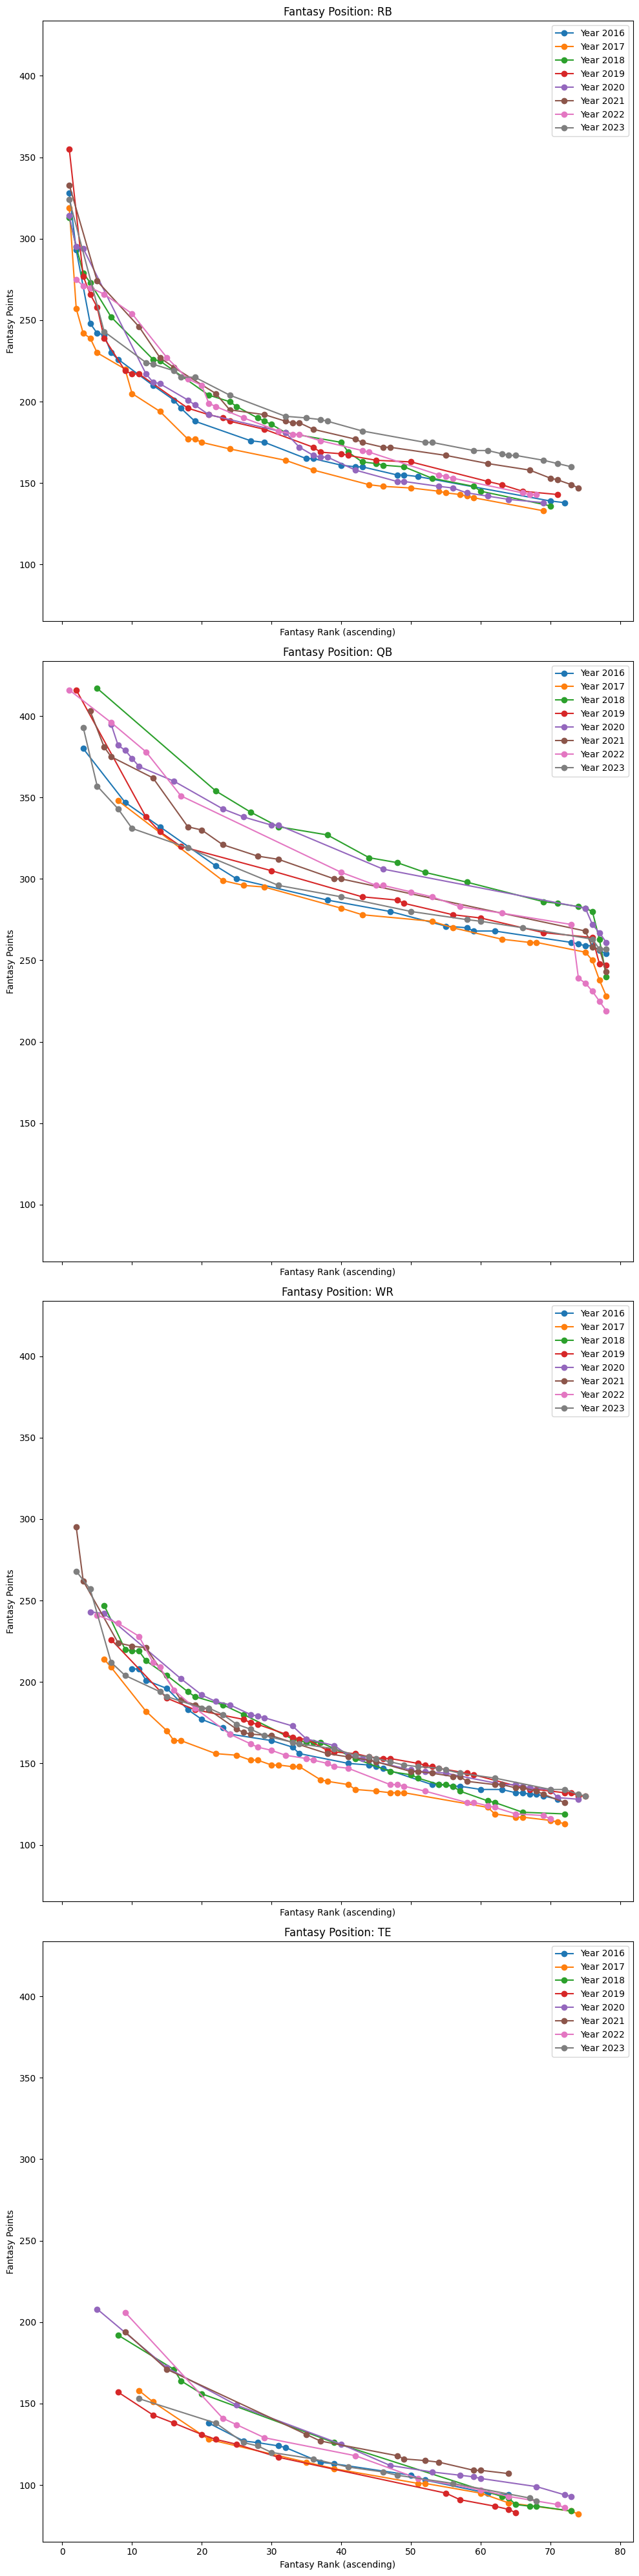

In [32]:
position_graph_data = %sql $position_graphs

# Sample DataFrame (replace with your actual DataFrame)
data = position_graph_data
df = pd.DataFrame(data)

# Get unique fantasy positions
positions = df['fantasy_pos'].unique()

# Create a grid of line graphs (one row per fantasy_pos)
fig, axs = plt.subplots(len(positions), 1, figsize=(10, 40), sharex=True, sharey=True)

# Iterate over each fantasy_pos and create a line graph
for i, pos in enumerate(positions):
    ax = axs[i]
    pos_data = df[df['fantasy_pos'] == pos].sort_values(by='fantasy_rank_overall')
    for year, group in pos_data.groupby('Year'):
        ax.plot(group['fantasy_rank_overall'], group['fantasy_points'], label=f'Year {year}', marker='o')
    ax.set_title(f'Fantasy Position: {pos}')
    ax.set_xlabel('Fantasy Rank (ascending)')
    ax.set_ylabel('Fantasy Points')
    ax.legend()

plt.tight_layout()
plt.show()


# Let's look at these graphs on the same plot

# AVERAGE performance for over the last few years

In [27]:
consolidated_graphs = """
SELECT
    fantasy_pos,
    fantasy_rank_pos,
    AVG(fantasy_points) AS avg_fantasy_points
FROM nfl_results
WHERE 1=1
    AND fantasy_rank_overall < 200
GROUP BY 1, 2
"""

In [33]:
%%sql
$consolidated_graphs
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,fantasy_rank_pos,avg_fantasy_points
QB,1,396.0
QB,2,356.75
QB,3,346.625
QB,4,334.125
QB,5,317.25
QB,6,306.125
QB,7,300.0
QB,8,294.25
QB,9,289.75
QB,10,285.125


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


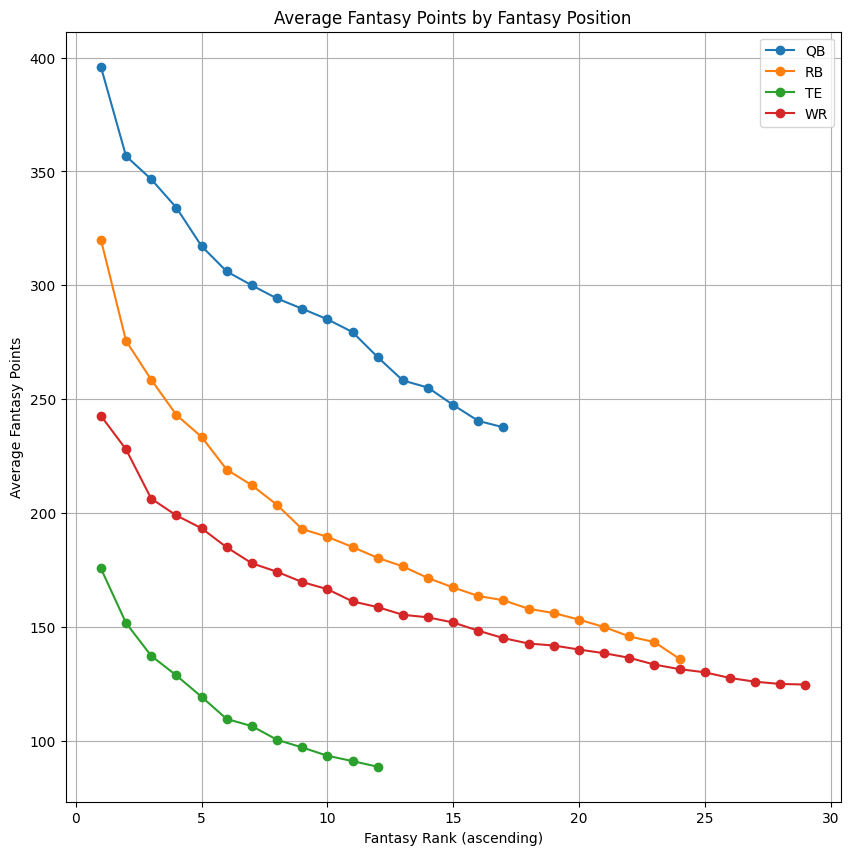

In [31]:
consolidated_graphs_data = %sql $consolidated_graphs

# Sample DataFrame (replace with your actual DataFrame)
data = consolidated_graphs_data
df = pd.DataFrame(data)

# Plotting all fantasy_pos in a single graph
plt.figure(figsize=(10, 10))
for pos in df['fantasy_pos'].unique():
    pos_data = df[df['fantasy_pos'] == pos].sort_values(by='fantasy_rank_pos')
    plt.plot(pos_data['fantasy_rank_pos'], pos_data['avg_fantasy_points'], label=pos, marker='o')

plt.title('Average Fantasy Points by Fantasy Position')
plt.xlabel('Fantasy Rank (ascending)')
plt.ylabel('Average Fantasy Points')
plt.legend()
plt.grid(True)
plt.show()


# Let's look at this with violin plots to get more detail on the RANGE of each of these individual datapoints

In [37]:
import seaborn as sns

In [48]:
%%sql
SELECT
    fantasy_pos,
    fantasy_points,
    fantasy_rank_pos,
    year
FROM nfl_results
WHERE 1=1
    AND fantasy_rank_overall < 200
    AND (fantasy_pos = 'TE' OR fantasy_pos = 'WR')
    AND fantasy_rank_pos = 1
ORDER BY fantasy_points DESC
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,fantasy_points,fantasy_rank_pos,Year
WR,295.0,1,2021
WR,268.0,1,2023
WR,247.0,1,2018
WR,243.0,1,2020
WR,241.0,1,2022
WR,226.0,1,2019
WR,214.0,1,2017
WR,208.0,1,2016
TE,208.0,1,2020
TE,206.0,1,2022


## Basically, look at the distribution above for the TOP overall scorer for WR and TEs

In [39]:
violin_graphs = """
SELECT
    fantasy_pos,
    fantasy_points,
    fantasy_rank_pos
FROM nfl_results
WHERE 1=1
    AND fantasy_rank_overall < 200
"""

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


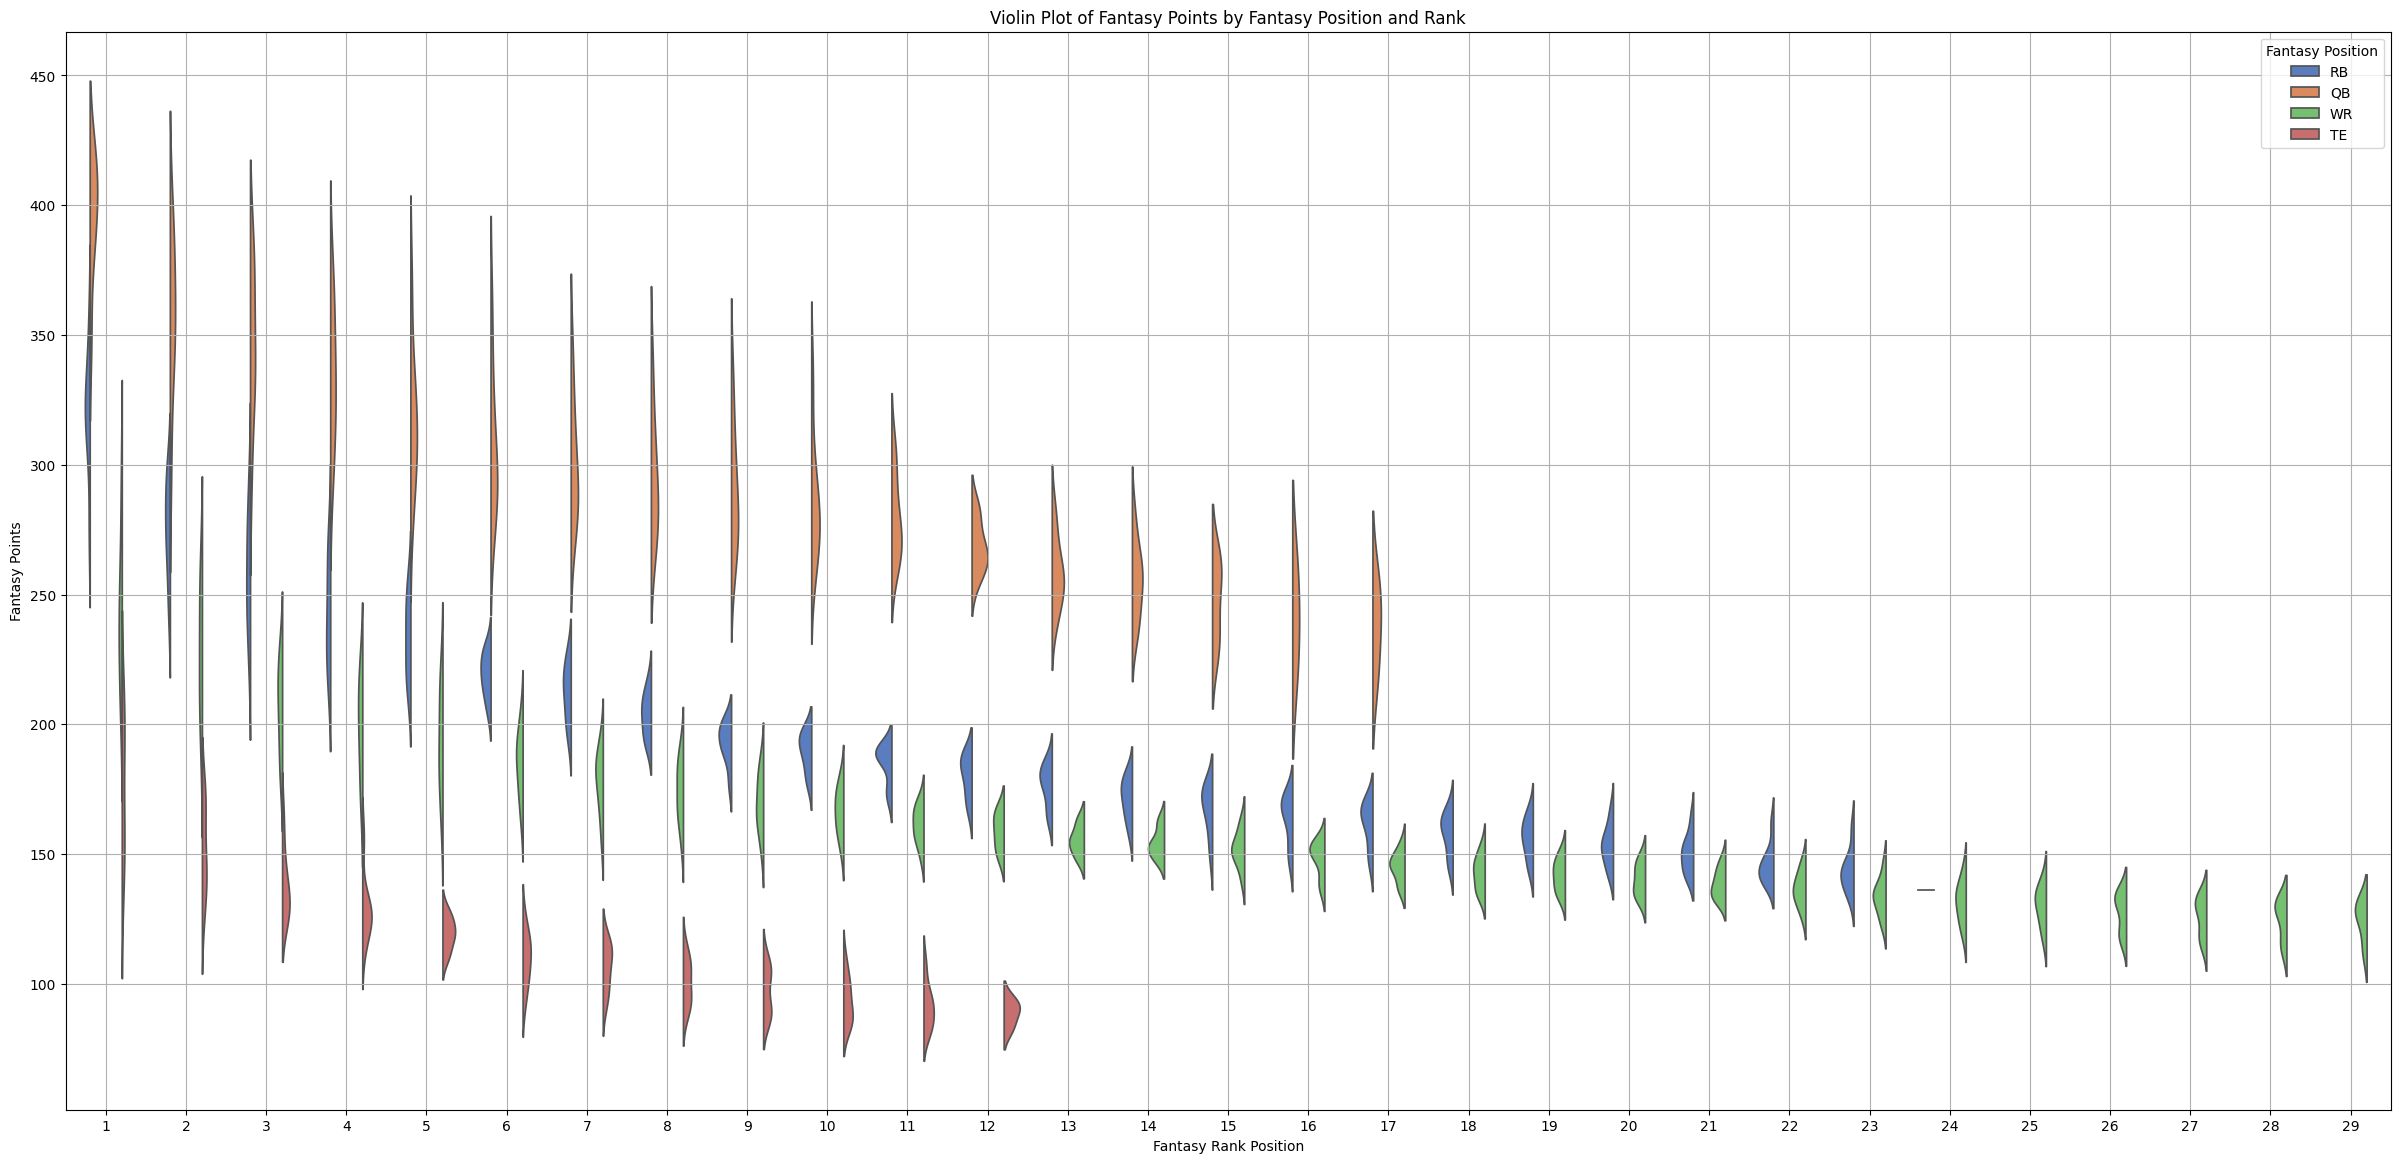

In [44]:
violin_graph_data = %sql $violin_graphs

# Sample DataFrame (replace with your actual DataFrame)
data = violin_graph_data
df = pd.DataFrame(data)

# Plotting a violin plot with separate violins for each fantasy_pos
plt.figure(figsize=(30, 14))
sns.violinplot(x='fantasy_rank_pos', y='fantasy_points', hue='fantasy_pos', data=df, palette='muted', split=True, inner=None)
plt.title('Violin Plot of Fantasy Points by Fantasy Position and Rank')
plt.xlabel('Fantasy Rank Position')
plt.ylabel('Fantasy Points')
plt.grid(True)
plt.legend(title='Fantasy Position')
plt.show()


# Lets see how this distribution has changed over time
For each fantasy rank, we're going to compare a given year vs the AVERAGE over the historical dataset.
Then we can plot that over time to see if things are changing or not. 

In [54]:
%%sql
SELECT
    fantasy_pos,
    fantasy_rank_pos,
    AVG(fantasy_points) AS avg_points
FROM nfl_results
WHERE 1=1
    AND fantasy_rank_overall < 200
GROUP BY 1, 2
ORDER BY 1, 2 ASC
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,fantasy_rank_pos,avg_points
QB,1,396.0
QB,2,356.75
QB,3,346.625
QB,4,334.125
QB,5,317.25
QB,6,306.125
QB,7,300.0
QB,8,294.25
QB,9,289.75
QB,10,285.125


In [73]:
time_vs_avg = """
SELECT
    nfl.fantasy_pos,
    nfl.fantasy_points,
    nfl.fantasy_rank_pos,
    favg.avg_points,
    nfl.fantasy_points - favg.avg_points AS delta_vs_h_avg,
    ROUND(((nfl.fantasy_points / favg.avg_points) - 1) * 100) AS pdelta_vs_h_avg,
    year
FROM nfl_results nfl
INNER JOIN (
    SELECT
        fantasy_pos,
        fantasy_rank_pos,
        AVG(fantasy_points) AS avg_points
    FROM nfl_results
    WHERE 1=1
        AND fantasy_rank_overall < 200
        AND fantasy_rank_pos <= 12
    GROUP BY 1, 2
) favg
ON nfl.fantasy_pos = favg.fantasy_pos
AND nfl.fantasy_rank_pos = favg.fantasy_rank_pos
WHERE 1=1
    AND fantasy_rank_overall < 200
    AND nfl.fantasy_rank_pos <= 12
ORDER BY nfl.fantasy_rank_pos DESC
"""

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


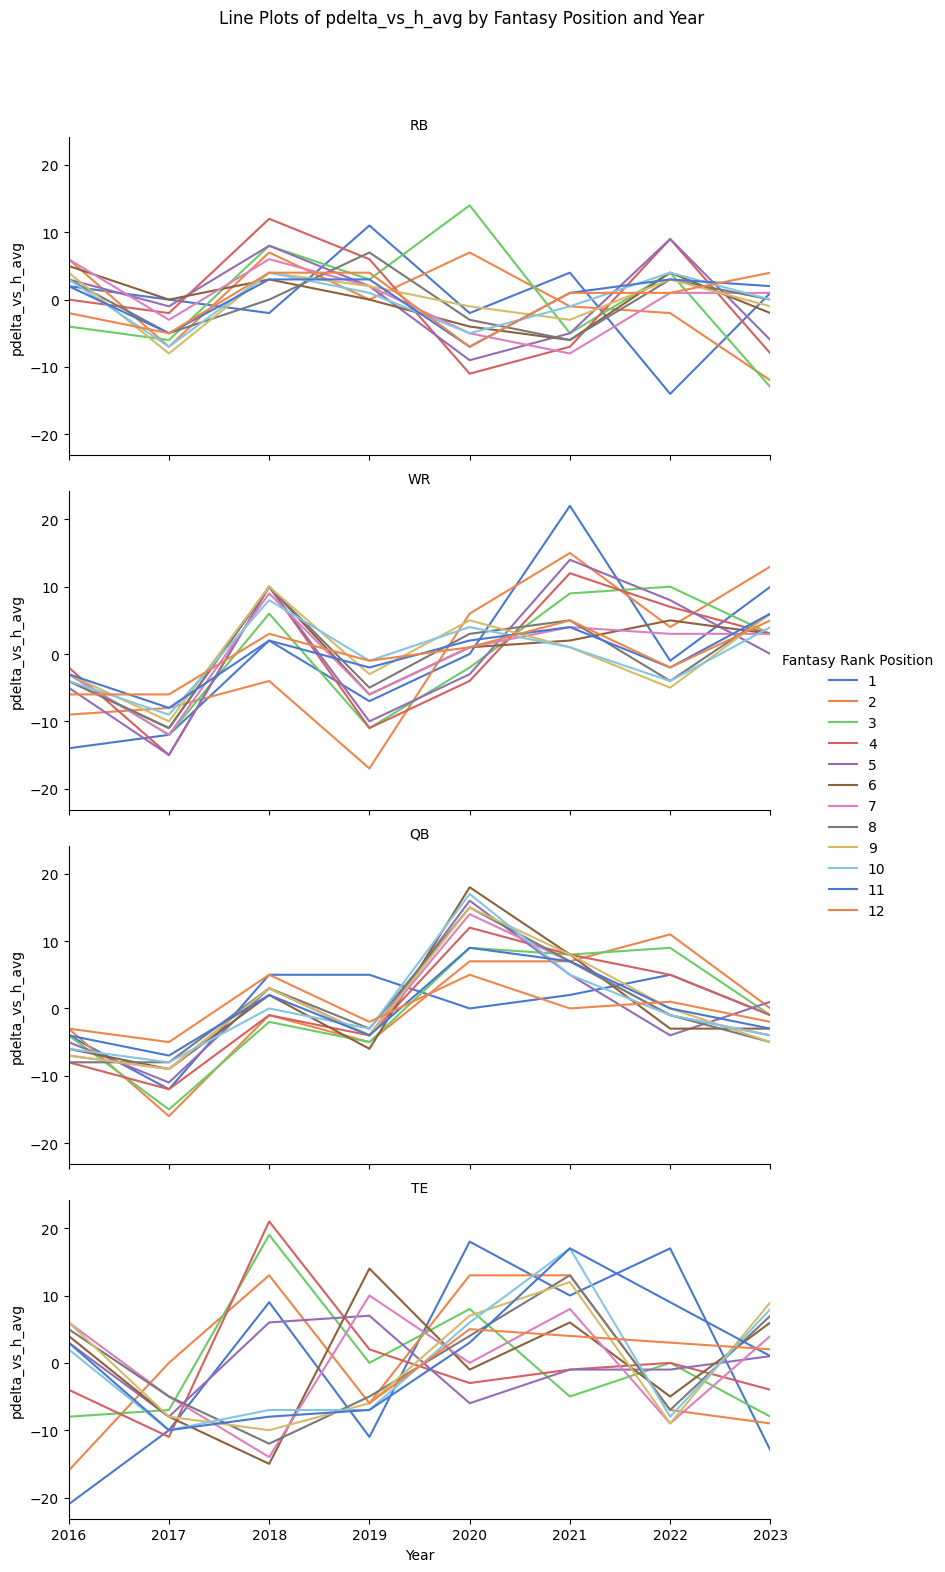

In [77]:
time_vs_avg_data = %sql $time_vs_avg

# Sample DataFrame (replace with your actual DataFrame)
data = time_vs_avg_data
df = pd.DataFrame(data)

# Create a FacetGrid
g = sns.FacetGrid(df, row="fantasy_pos", hue="fantasy_rank_pos", aspect=2, height=4, palette='muted')

# Map the lineplot onto the grid
g.map(sns.lineplot, "Year", "pdelta_vs_h_avg").add_legend(title='Fantasy Rank Position')

# Customize the plot
g.set_axis_labels("Year", "pdelta_vs_h_avg")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set(xlim=(df['Year'].min(), df['Year'].max()))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Plots of pdelta_vs_h_avg by Fantasy Position and Year')

plt.show()

Takeaways:
- RB: scoring is stable. vs the average of historical, not much has changed over time. RBs continue to score basically the same things that we've seen historically. The delta of 2024 vs historical avg for a given rb rank is no different than i twas in 2016
- WR: wow, WR scoring has gone way up even for a WR of the SAME rank. That is to say that a WR1 in 2024 scored more than the WR1 in 2016... but so did ALL of the other WR#s
- QB: The same thing is happening here too. 2020 was a HAYDAY for QBs, but they still are scoring more vs the historical average for that QB# over time
- TE: no noticable trend. 

# Let's look at the change in WR and QB a bit more

In [86]:
wr_focus = """
SELECT
    fantasy_pos,
    fantasy_points,
    year,
    fantasy_rank_pos
FROM nfl_results nfl
WHERE 1=1
    AND fantasy_rank_pos <= 30
"""

In [87]:
%%sql
$wr_focus
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,fantasy_points,Year,fantasy_rank_pos
RB,328.0,2016,1
RB,293.0,2016,2
QB,380.0,2016,1
RB,248.0,2016,3
RB,242.0,2016,4
RB,241.0,2016,5
RB,230.0,2016,6
RB,226.0,2016,7
QB,347.0,2016,2
WR,208.0,2016,1


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


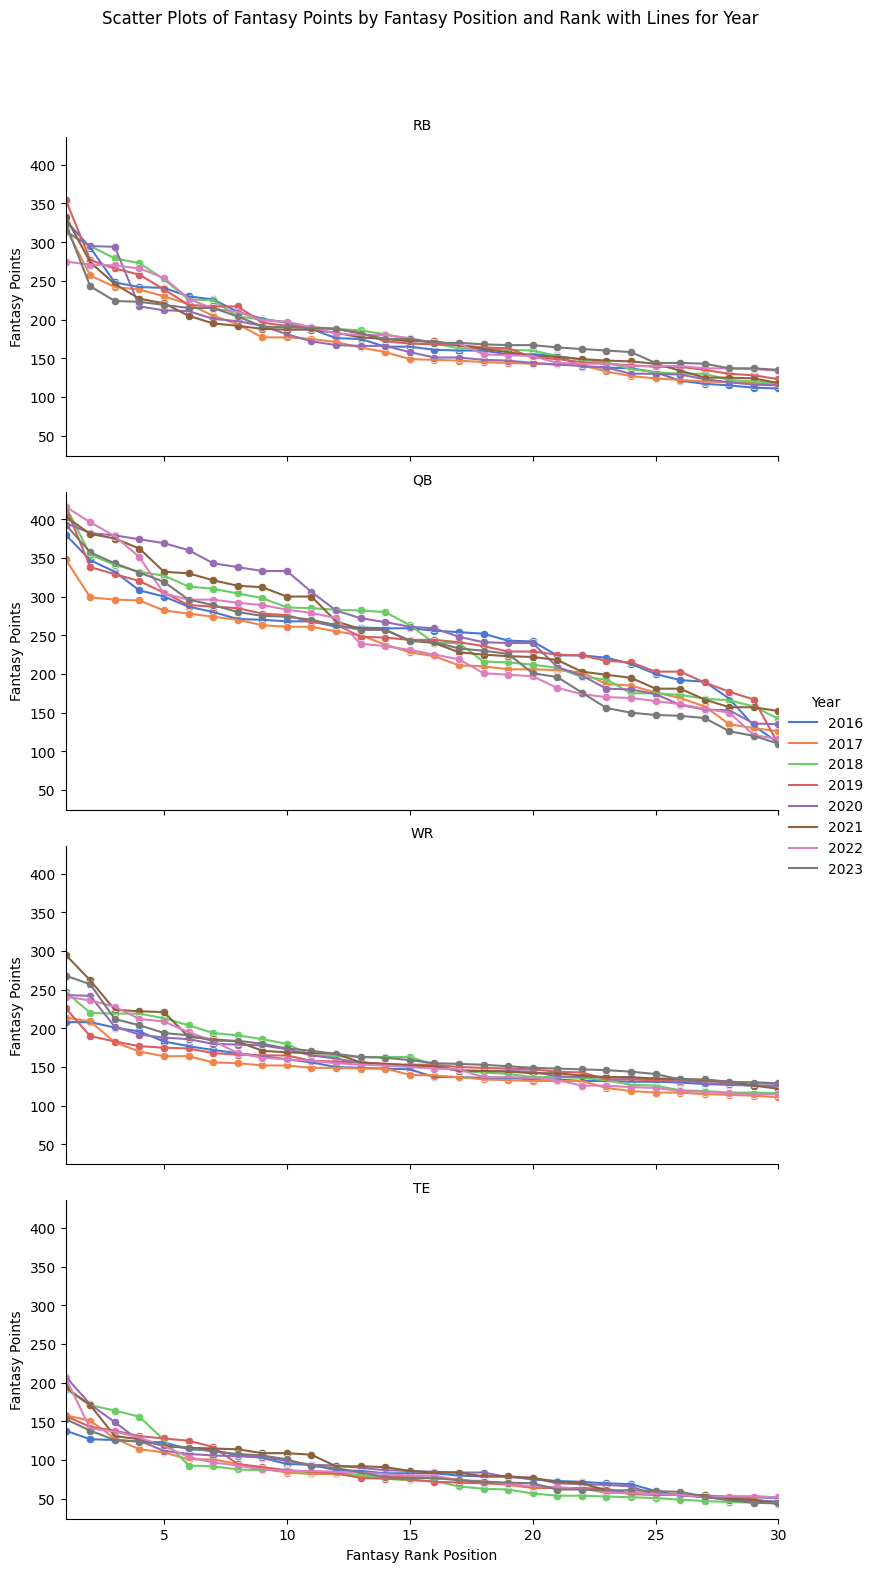

In [91]:
# Sample DataFrame (replace with your actual DataFrame)
data = %sql $wr_focus
df = pd.DataFrame(data)


df = pd.DataFrame(data)
# Create a FacetGrid
g = sns.FacetGrid(df, row="fantasy_pos", hue="Year", aspect=2, height=4, palette='muted')

# Map the scatterplot and lineplot onto the grid
g.map(sns.scatterplot, "fantasy_rank_pos", "fantasy_points")
g.map(sns.lineplot, "fantasy_rank_pos", "fantasy_points").add_legend(title='Year')

# Customize the plot
g.set_axis_labels("Fantasy Rank Position", "Fantasy Points")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set(xlim=(df['fantasy_rank_pos'].min(), df['fantasy_rank_pos'].max()))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of Fantasy Points by Fantasy Position and Rank with Lines for Year')

plt.show()

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


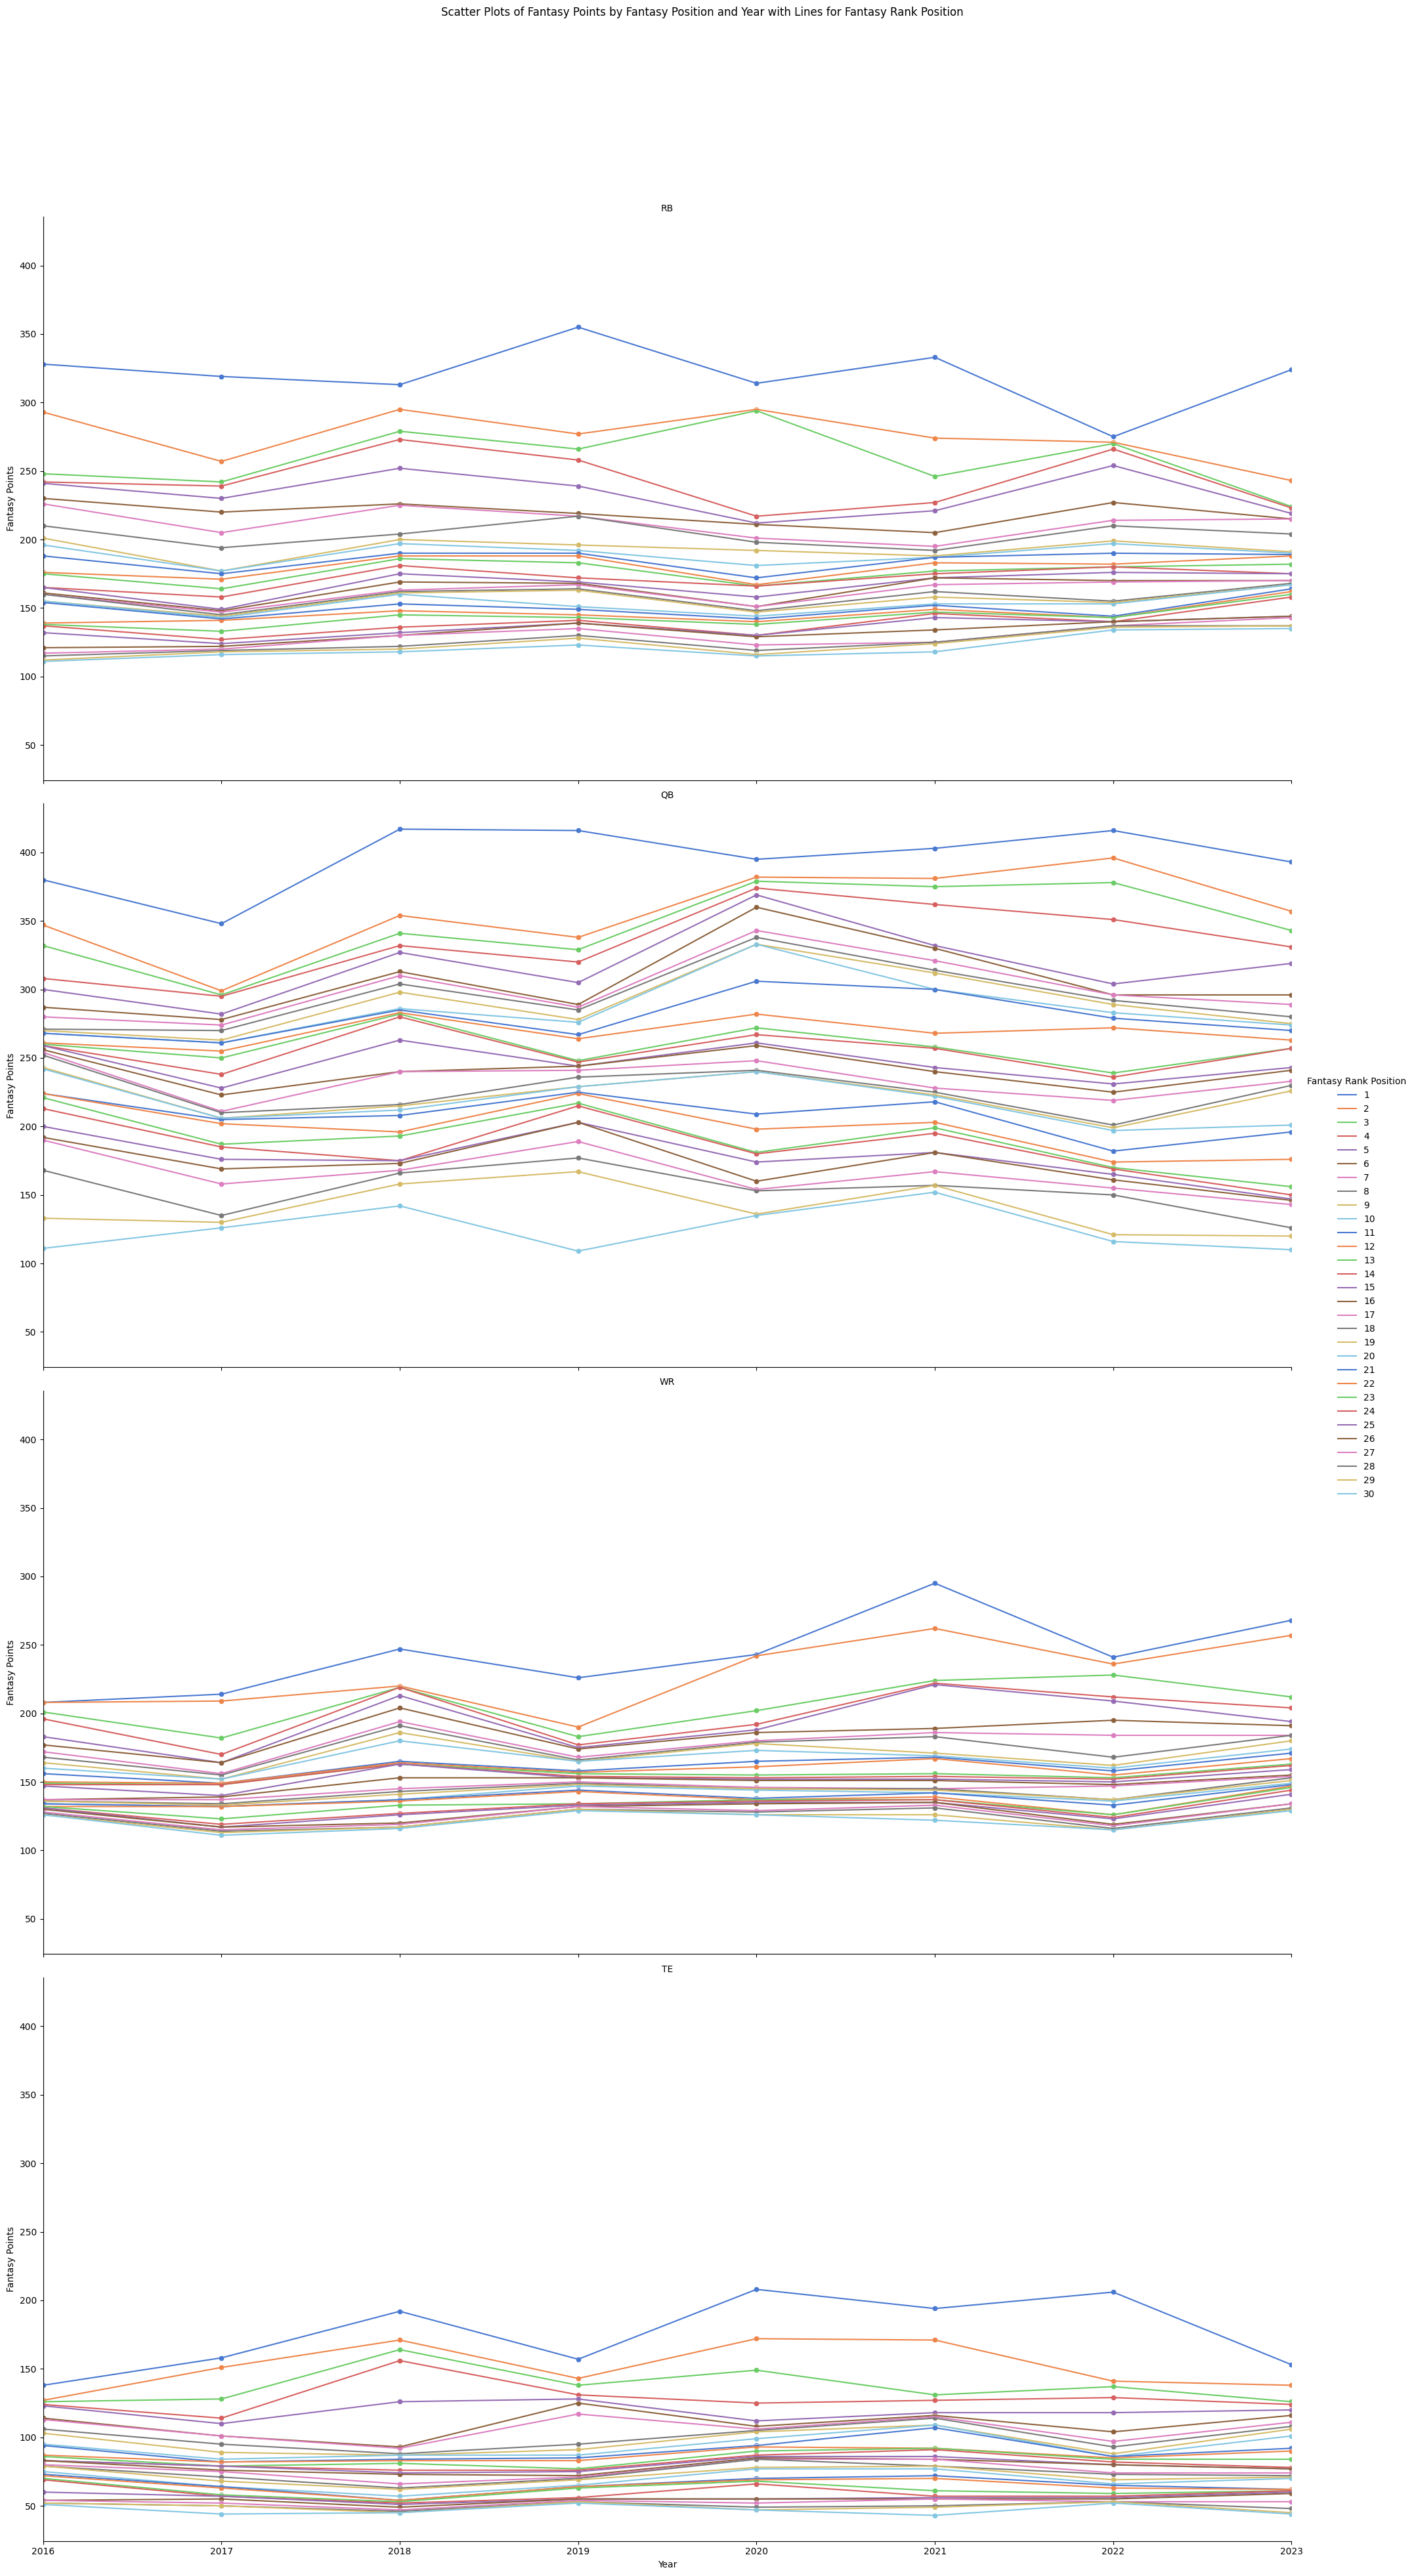

In [93]:
# Sample DataFrame (replace with your actual DataFrame)
data = %sql $wr_focus
df = pd.DataFrame(data)

# Create a FacetGrid
g = sns.FacetGrid(df, row="fantasy_pos", hue="fantasy_rank_pos", aspect=2, height=10, palette='muted')

# Map the scatterplot and lineplot onto the grid
g.map(sns.scatterplot, "Year", "fantasy_points")
g.map(sns.lineplot, "Year", "fantasy_points").add_legend(title='Fantasy Rank Position')

# Customize the plot
g.set_axis_labels("Year", "Fantasy Points")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set(xlim=(df['Year'].min(), df['Year'].max()))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of Fantasy Points by Fantasy Position and Year with Lines for Fantasy Rank Position')

plt.show()